# Medical examinations analysis

<hr style="border: 2px solid blue"/>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
exams = pd.read_csv('medical_examinations_data.csv')

In [3]:
exams.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<hr style="border:2px solid blue"/>

## Cleaning data

In [4]:
height_lower_limit = np.percentile(exams['height'], 2.5)
height_upper_limit = np.percentile(exams['height'], 97.5)
weight_lower_limit = np.percentile(exams['weight'], 2.5)
weight_upper_limit = np.percentile(exams['weight'], 97.5)

indexes = exams.loc[
    (exams['ap_lo'] > exams['ap_hi']) |
    (exams['height'] < height_lower_limit) |
    (exams['height'] > height_upper_limit) |
    (exams['weight'] < weight_lower_limit) |
    (exams['weight'] > weight_upper_limit)
].index

exams.drop(indexes, inplace=True)

<hr style="border: 2px solid blue"/>

## Adding 'overweight' column

In [5]:
exams['overweight'] = (exams['weight']/(exams['height']/100)**2 > 25).astype(int)

<hr style="border:2px solid blue"/>

## Normalizing data

In [6]:
exams['cholesterol'] = (exams['cholesterol'] > 1).astype(int)
exams['gluc'] = (exams['gluc'] > 1).astype(int)

exams.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


<hr style="border:2px solid blue"/>

## Plotting a chart with counts to cardio=0 and cardio=1

In [7]:
counts_by_cardio = pd.melt(
    exams, 
    var_name = 'variable',
    value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'],
    id_vars = 'cardio'
)

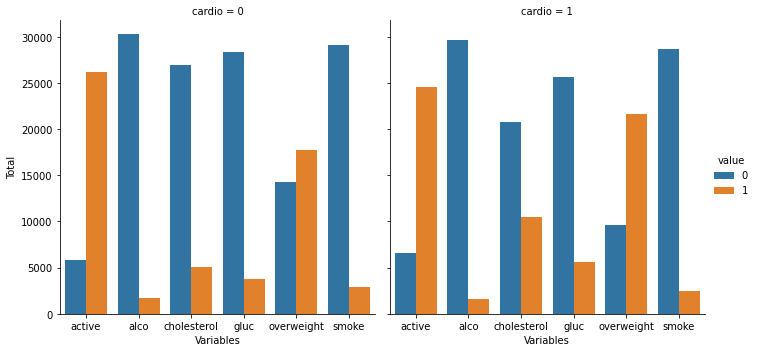

In [8]:
sns.catplot(data=counts_by_cardio, kind="count", x="variable", hue="value", col="cardio"
                  ).set_axis_labels("Variables", "Total")

<hr style="border:2px solid blue"/>

## Ploting the correlation matrix

In [9]:
corr = exams.corr()
mask = np.triu(corr)

<AxesSubplot:>

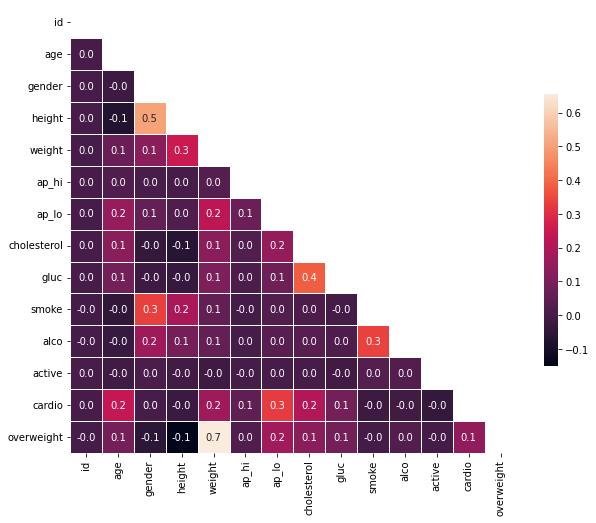

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask = mask, fmt='.1f', linewidth=1,square=True, cbar_kws = {'shrink': 0.5}, annot=True)